# **1.Defining the Question**

**a.Specifying the Question**

We have been recruited as a football analyst in Mchezopesa Ltd and tasked to predict results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly,including rank in our training.

**b.Defining the Metric for Success**

Creating an effective model that will be able to;

1.Predict how many goals the home team scores.

2.Predict how many goals the away team scores.

3.Figure out from the home teams perspective if the game is a Win,Loss or Draw.

**c.Understanding the Context**

The Men's Fifa WorldRanking is a ranking system for men's national teams in football association.The teams are ranked based on their game results with the most successful teams being ranked highest.The rankis were introduced in December 1992.
A point system is used,with points being awarded based on the results of all Fifa_recognised full international matches.

However,in August 2018 the ranking system was revamped and have adopted the Elo rating system used in chess and go.

**d.Recording the Experimental Design**

The following steps will be followed during the analysis;




1.Defining the question

2.Reading the Data

3.Checking the data

4.Data Cleaning

5.Performing Explolatory Data Analysis-Univariate and Bivariate Analysis

6.Prediction Models-Polynomial and Logistic Regression Models

7.Challenging the solution

8.Conclusion.   






**e.Data Relevance**

This will be discussed after the analysis and prediction models have been performed.

**2.Reading the Data**

**Importing our Libraries**

In [100]:
#importing all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm


In [101]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

#let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

**Loading and previewing our datasets**

In [102]:
#Loading the  ranks datasets to our working environment
rank=pd.read_csv('/fifa_ranking.csv')
ranks.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [103]:
#previewing the last 5 records
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [104]:
#Loading the results dataset
results=pd.read_csv('/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [105]:
#previewing the last 5 records
results.tail()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


# **3.Checking the Data**

**Checking the Ranking dataset**

In [106]:
#Checking the rows 

rank.shape

(57793, 16)

In [107]:
#ckecking the columns in the dataset
rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [108]:
#checking if each column has appropriate datatypes
rank.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [109]:
#checking the dataset information
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [110]:
#checking the statistic summaries of the dataset
rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


**Checking the Results Dataset**

In [111]:
#checking the number records in the dataset

results.shape

(40839, 9)

In [112]:
#checking the columns in the dataset

results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [113]:
#checking if the columns has the appropriate data types

results.dtypes


date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [114]:
#checking the dataset information
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [115]:
#checking the statistic summaries of the dataset
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# **4.Data Cleaning**

In [116]:
#Checking for missing values in the rank dataset
rank.isnull().sum()

#From the output, we have no missing values

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [117]:
#checking for missing values in results dataset

results.isnull().sum()

#we have no missing values in the dataset

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [118]:
#Checking for duplicates in the rank dataset

rank.duplicated().sum()

37

In [119]:
#peviewing the duplicated values
rank[rank.duplicated()]

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41536,120,Sudan,SDN,264.81,297,-7,129.14,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,2012-01-18
41736,111,Sudan,SDN,301.67,265,9,156.34,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2012-02-15
41944,110,Sudan,SDN,299.75,302,1,156.34,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,2012-03-07
42157,113,Sudan,SDN,292.03,300,-3,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-04-11
42366,113,Sudan,SDN,292.03,292,0,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-05-09
42562,101,Sudan,SDN,338.25,292,12,179.70,179.70,209.32,104.66,7.08,2.12,258.83,51.77,CAF,2012-06-06
42775,105,Sudan,SDN,329.36,338,-4,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-07-04
42983,104,Sudan,SDN,329.36,329,1,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-08-08
43193,103,Sudan,SDN,331.79,329,1,169.05,169.05,187.77,93.88,108.13,32.44,182.11,36.42,CAF,2012-09-05


In [120]:
#Checking for duplicates in the results dataset
results.duplicated().sum()

#we have no duplicated in the dataset

0

In [121]:
#changing the date in the rank dataset to datetime

rank.rank_date = pd.to_datetime(rank.rank_date)
results.date = pd.to_datetime(results.date)

In [122]:
#checking the unique values in the rank date column
rank.rank_date.dt.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [123]:
#checking for unique values in theresults date column
results.date.dt.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [124]:
# Removing the day from the date time in the ranking dataset
rank['rank_date'] = rank['rank_date'].dt.strftime('%Y-%m')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08


In [125]:
# Removing the day from the date time column in the results dtaset
results['date'] = results['date'].dt.strftime('%Y-%m')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03,England,Scotland,4,2,Friendly,London,England,False
2,1874-03,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03,England,Scotland,2,2,Friendly,London,England,False
4,1876-03,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [126]:
#Dropping the unnecessary columns
rank = rank.drop(columns=['country_abrv', 'total_points', 'rank_change','cur_year_avg',
                   'cur_year_avg_weighted', 'previous_points', 'last_year_avg',	'last_year_avg_weighted', 'two_year_ago_avg',
                   'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted',
                   'confederation'])

**Merging the datasets**

In [127]:

home_merged = pd.merge(results, rank, how = 'inner', left_on=['date', 'home_team'], right_on=['rank_date', 'country_full'])

In [128]:
away_merged = pd.merge(results, rank, how = 'inner', left_on=['date', 'away_team'], right_on=['rank_date', 'country_full'])

In [129]:
fifa_final = pd.merge(home_merged, away_merged, how='inner', left_on=['date', 'away_team', 'home_score', 'away_score', 'home_team', 'tournament', 'country'], right_on=['date', 'away_team', 'home_score', 'away_score', 'home_team', 'tournament', 'country'])

In [130]:
#previewing the first 5 records of our merged dataset
fifa_final.head()

,date,home_team,away_team,home_score,away_score,tournament,city_x,country,neutral_x,rank_x,country_full_x,rank_date_x,city_y,neutral_y,rank_y,country_full_y,rank_date_y
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08,Barranquilla,False,67,Paraguay,1993-08
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08,Barranquilla,False,5,Argentina,1993-08
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,19,Colombia,1993-08,Barranquilla,False,70,Peru,1993-08
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,70,Peru,1993-08,Lima,False,5,Argentina,1993-08
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,70,Peru,1993-08,Lima,False,19,Colombia,1993-08


In [131]:
#dropping the columns we wont need during the analysis
fifa_final  = fifa_final.drop(columns=['city_x', 'city_y', 'country', 'neutral_x', 'neutral_y', 'rank_date_x', 'rank_date_y', 'country_full_x', 'country_full_y'])
fifa_final

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_y
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,19,70
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,70,5
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,70,19
...,...,...,...,...,...,...,...,...
17024,2018-06,Nigeria,Iceland,2,0,FIFA World Cup,48,22
17025,2018-06,Nigeria,Argentina,1,2,FIFA World Cup,48,5
17026,2018-06,Australia,Peru,0,2,FIFA World Cup,36,11
17027,2018-06,Senegal,Colombia,0,1,FIFA World Cup,27,16


In [132]:
#checking the shape of our merged dataset
fifa_final.shape

(17029, 8)

In [133]:
#Creating a new column to show the match outcome
fifa_final['result'] = fifa_final['home_score'] - fifa_final['away_score']


In [134]:
#previewing the dataset if the new column has been added
fifa_final.head()

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_y,result
0,1993-08,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67,0
1,1993-08,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5,1
2,1993-08,Colombia,Peru,4,0,FIFA World Cup qualification,19,70,4
3,1993-08,Peru,Argentina,0,1,FIFA World Cup qualification,70,5,-1
4,1993-08,Peru,Colombia,0,1,FIFA World Cup qualification,70,19,-1


In [135]:
#creating a function for the win ,loss and draw

def result(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

In [136]:
#Implementing and applying our function that will determine if a matchis a win,lose or draw

fifa_final['results']=fifa_final.result.apply(lambda x: result(x))

In [137]:
fifa_final.tournament = fifa_final.tournament.apply(lambda x: 'World Cup' if x == 'FIFA World Cup qualification' 
                                            else ( 'World Cup' if x == 'FIFA World Cup' else ('Friendly' if x == 'Friendly' else 'Other')))

In [138]:
fifa_final.head()

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_y,result,results
0,1993-08,Colombia,Paraguay,0,0,World Cup,19,67,0,draw
1,1993-08,Colombia,Argentina,2,1,World Cup,19,5,1,win
2,1993-08,Colombia,Peru,4,0,World Cup,19,70,4,win
3,1993-08,Peru,Argentina,0,1,World Cup,70,5,-1,loss
4,1993-08,Peru,Colombia,0,1,World Cup,70,19,-1,loss


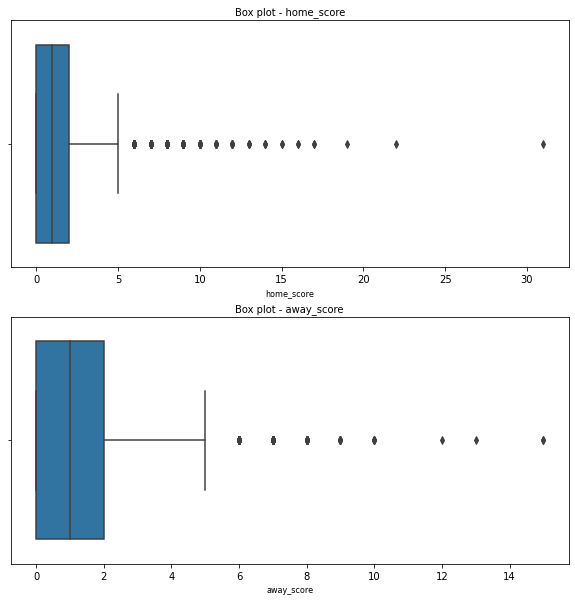

In [139]:
# Checking for Anomalies
# Checking for outliers in the columns with numerical data

col_names = ['home_score', 'away_score']

fig, ax = plt.subplots(len(col_names), figsize=(10,10))

for i, col_val in enumerate(col_names):
    sns.boxplot(fifa_final[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()
# we have outliers in the dataset

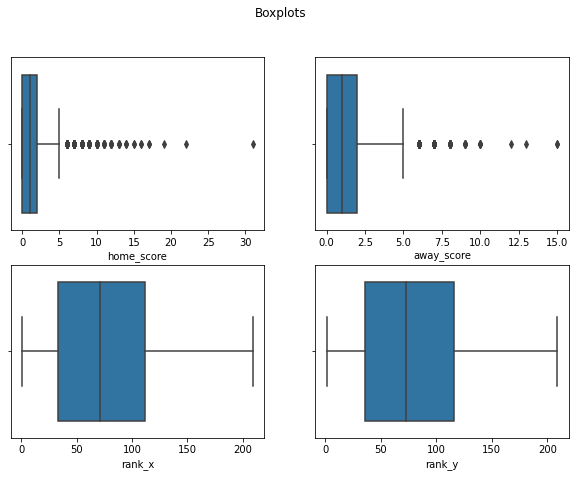

In [140]:
#Checking for outliers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(fifa_final['home_score'], ax=ax1)
sns.boxplot(fifa_final['away_score'], ax=ax2)
sns.boxplot(fifa_final['rank_x'], ax=ax3)
sns.boxplot(fifa_final['rank_y'], ax=ax4)
plt.show()

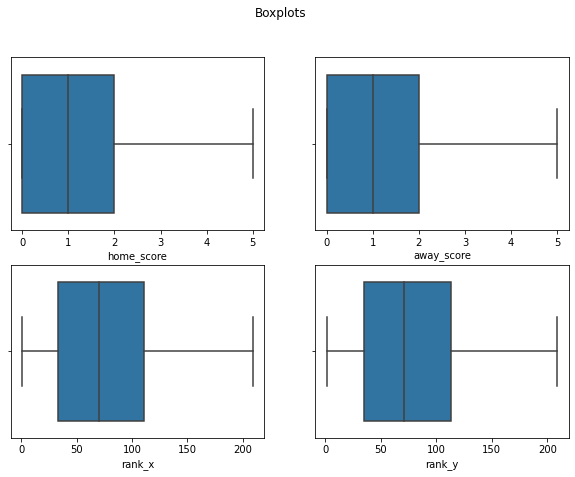

In [141]:

#Dropping the outliers in home and away scores
fifa_final.drop(fifa_final[fifa_final['home_score']>5].index, inplace=True)

fifa_final.drop(fifa_final[fifa_final['away_score']>5].index, inplace=True)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(fifa_final['home_score'], ax=ax1)
sns.boxplot(fifa_final['away_score'], ax=ax2)
sns.boxplot(fifa_final['rank_x'], ax=ax3)
sns.boxplot(fifa_final['rank_y'], ax=ax4)
plt.show()

In [142]:
#Checking for missing values
fifa_final.isnull().sum()
#no missing values in the dataset

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
rank_x        0
rank_y        0
result        0
results       0
dtype: int64

In [143]:
#checking for duplicated values
fifa_final.duplicated().sum()

164

In [144]:
#dropping the duplicated values
fifa_final.drop_duplicates(subset=['date','home_team','away_team','home_score','away_score','tournament'], keep= 'first', inplace= True)

In [145]:
#checking if the duplicates have been dropped
fifa_final.duplicated().sum()

0

In [146]:

fifa_final.tournament.unique()

array(['World Cup', 'Friendly', 'Other'], dtype=object)

In [154]:
#Renaming columns
fifa_final.rename(columns={'rank_x' : 'home_team_rank', 'rank_y' : 'away_team_rank'}, inplace=True)
fifa_final.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,result,results
0,1993-08,Colombia,Paraguay,0,0,World Cup,19,67,0,draw
1,1993-08,Colombia,Argentina,2,1,World Cup,19,5,1,win
2,1993-08,Colombia,Peru,4,0,World Cup,19,70,4,win
3,1993-08,Peru,Argentina,0,1,World Cup,70,5,-1,loss
4,1993-08,Peru,Colombia,0,1,World Cup,70,19,-1,loss


# **5.Exloratory Data Analysis**

**Univariate Analysis**

**Categorical Variables**

In [147]:
#finding the summary statistics for our dataframe
fifa_final.describe()

,home_score,away_score,rank_x,rank_y,result
count,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000
mean,1.469023,1.029585,75.533948,77.363619,0.439438
std,1.281202,1.104803,50.364457,51.074113,1.794292
min,0.000000,0.000000,1.000000,1.000000,-5.000000
25%,0.000000,0.000000,33.000000,35.000000,-1.000000
50%,1.000000,1.000000,70.000000,71.000000,0.000000
75%,2.000000,2.000000,111.000000,113.000000,2.000000
max,5.000000,5.000000,209.000000,209.000000,5.000000


In [148]:
#generating a frequency table for home_team
fifa_final['home_team'].value_counts().to_frame()

,home_team
Mexico,238
Saudi Arabia,201
Japan,193
Oman,184
Qatar,182
...,...
Kosovo,7
Anguilla,6
Montserrat,5
Gibraltar,4


In [149]:
#generating a frequency table for away_team
fifa_final['away_team'].value_counts().to_frame()

,away_team
Zambia,187
Sweden,158
Paraguay,157
Finland,156
Costa Rica,155
...,...
American Samoa,6
Turks and Caicos Islands,6
Kosovo,6
Gibraltar,5


Text(0.5, 1.0, 'Tournaments')

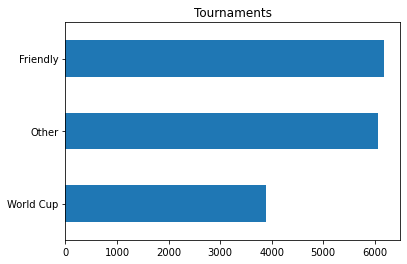

In [150]:

# Bar graph showing tournaments

fifa_final.tournament.value_counts().head(10).sort_values().plot.barh()
plt.title('Tournaments')



# Other types of tournaments are played frequently (probably yearly) whereas,
# the worldcup has a low number of occurence since it is only played every four years

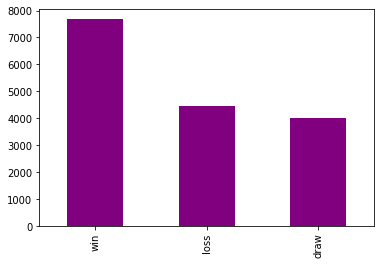

In [151]:
#plotting a bar graph to show the results
fifa_final['results'].value_counts().plot.bar(color='purple')

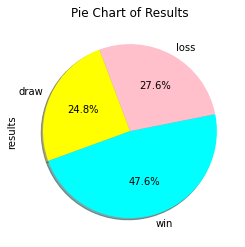

In [152]:

colors = ['cyan', 'pink', 'yellow']
fifa_final['results'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 200)
plt.title('Pie Chart of Results')
plt.show()

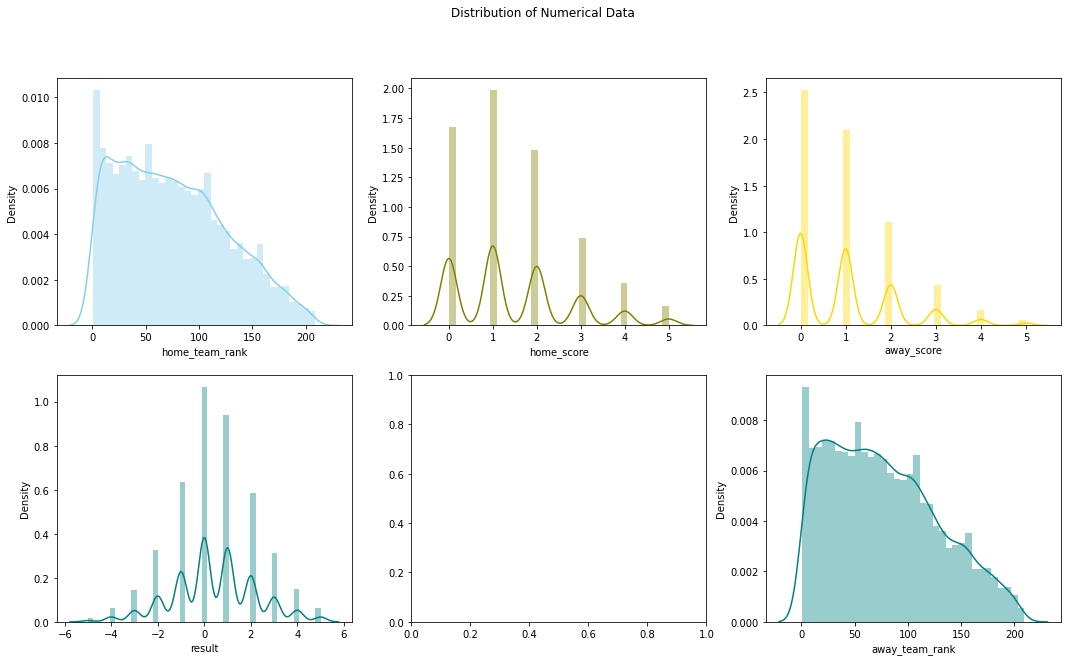

In [156]:

# let us check the distributions of our data
# we will use 

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Distribution of Numerical Data')

sns.distplot( fifa_final["home_team_rank"] , color="skyblue", ax=axes[0, 0])
sns.distplot( fifa_final["home_score"] , color="olive", ax=axes[0, 1])
sns.distplot( fifa_final["away_score"] , color="gold", ax=axes[0, 2])
sns.distplot( fifa_final["result"] , color="teal", ax=axes[1, 0])
sns.distplot( fifa_final["away_team_rank"] , color="teal", ax=axes[1, 2])

# our data is normally distributed

**Numerical Variables**


**Measures of Dispersion**


In [157]:
fifa_final['home_score'].std()

1.2812024390453602

In [158]:
fifa_final['away_score'].std()

1.1048033312209988

In [159]:
fifa_final['home_score'].var()

1.64147968981578

In [160]:
fifa_final['away_score'].var()

1.220590400677016

In [161]:
fifa_final['home_score'].kurt()

-0.000556469544579663

In [162]:
fifa_final['away_score'].kurt()

1.004978788236814

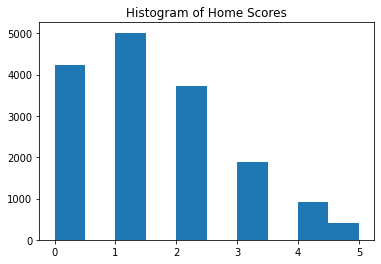

In [163]:
#Histogram of home scores
plt.figure(figsize = [6,4])
plt.hist(fifa_final['home_score'])
plt.title('Histogram of Home Scores')
plt.show()

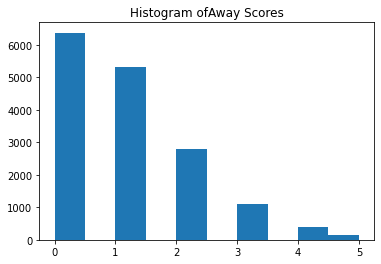

In [164]:
#Histogram of home scores
plt.figure(figsize = [6,4])
plt.hist(fifa_final['away_score'])
plt.title('Histogram ofAway Scores')
plt.show()

**Bivariate Analysis**

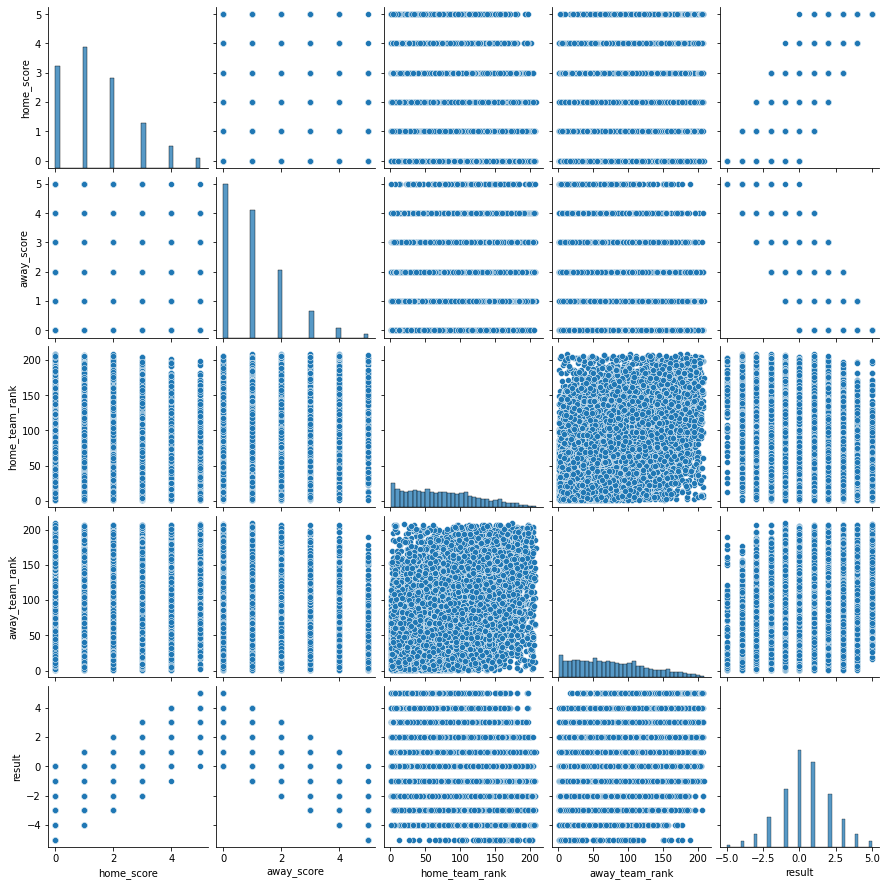

In [165]:

# Ploting the bivariate summaries and recording our observations
sns.pairplot(fifa_final)
plt.show()

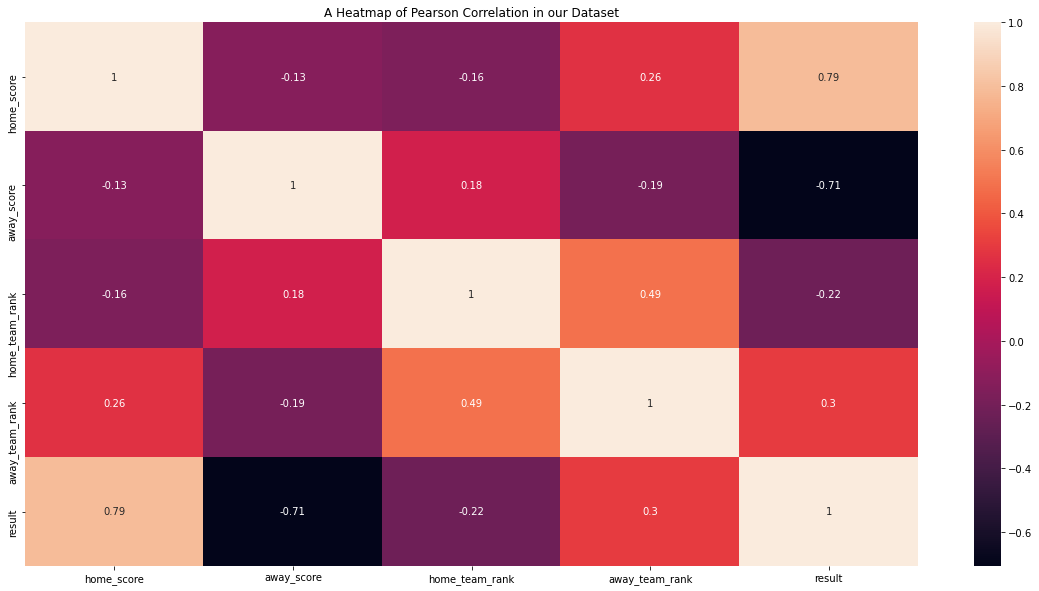

In [166]:

# Calculating the pearson coefficient correlation
a = fifa_final.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset')
plt.show()

**Categorical and Numerical**

Text(0.5, 1.0, 'Home Score vs Results')

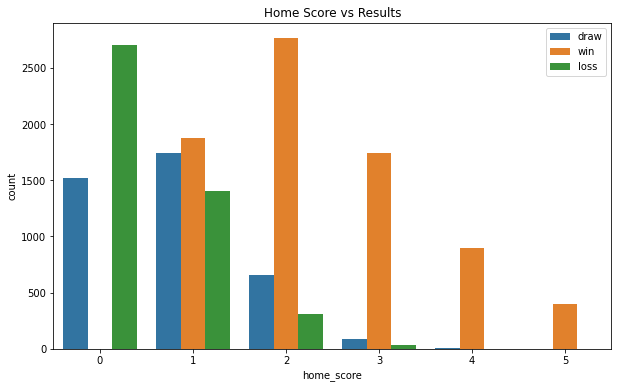

In [167]:
plt.figure(figsize=(10,6))
sns.countplot('home_score', hue='results', data=fifa_final)
plt.legend(loc="upper right")
plt.title('Home Score vs Results')

Text(0.5, 1.0, 'Away Score vs Results')

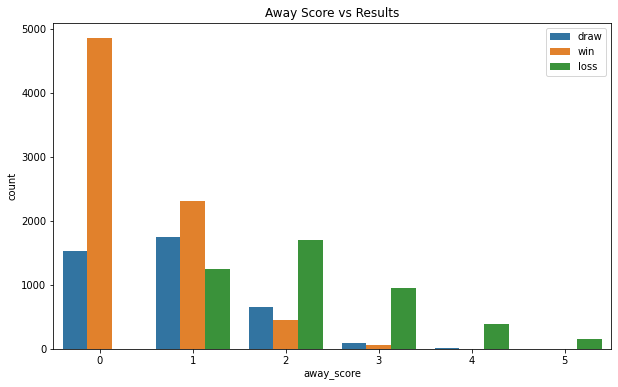

In [168]:

plt.figure(figsize=(10,6))
sns.countplot('away_score', hue='results', data=fifa_final)
plt.legend(loc="upper right")
plt.title('Away Score vs Results')

# **6.Predictive Analysis**

**1.Polynomial Regression**

**Predicing Home Team Scores**

In [170]:

#Importing the libraries we are going to use

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [171]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fifa_final['tournament'] =le.fit_transform(fifa_final['tournament'])

In [172]:
#Declaring our dependent and independent variables
X = fifa_final[['home_team_rank','away_team_rank','tournament']].values
y = fifa_final['home_score'].values

In [175]:
# Displaying the correlations between the variables
# we exclude the home score since it is our target variable
correlations= fifa_final[['home_team_rank','away_team_rank','tournament']].corr()
correlations


,home_team_rank,away_team_rank,tournament
home_team_rank,1.000000,0.487638,0.025313
away_team_rank,0.487638,1.000000,0.005498
tournament,0.025313,0.005498,1.000000


Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we could have a difficulty distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [180]:

correlations= fifa_final[['home_team_rank','away_team_rank','tournament']].corr()
correlations

,home_team_rank,away_team_rank,tournament
home_team_rank,1.000000,0.487638,0.025313
away_team_rank,0.487638,1.000000,0.005498
tournament,0.025313,0.005498,1.000000



VIF exceeding 5 or 10 indicates high multicollinearity between independent variables. our variables do not exceed 5 hence we conclude that there is no multicollinearity between our independent variables.

In [185]:
#Splitting the data into train and test tests

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state=42)

In [186]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
# Running the prediction
y_pred = pol_reg.predict(X_poly)
y_pred

array([2.0850204 , 1.12856973, 2.12209598, ..., 1.05346781, 1.23963237,
       1.04355294])

In [188]:
# evaluating our model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)

1.1514564593907666
0.19223244021346542



Our model yields an RMSE of 1.15 and our R2 is 19%.The RMSE is almost the value of the mean of our target variable hence we might need to reevaluate our model and redefine our independent variables.

**Predicting Away Team Scores**

In [202]:
fifa_final.describe()

,home_score,away_score,tournament,home_team_rank,away_team_rank,result
count,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000
mean,1.469023,1.029585,0.858266,75.533948,77.363619,0.439438
std,1.281202,1.104803,0.777302,50.364457,51.074113,1.794292
min,0.000000,0.000000,0.000000,1.000000,1.000000,-5.000000
25%,0.000000,0.000000,0.000000,33.000000,35.000000,-1.000000
50%,1.000000,1.000000,1.000000,70.000000,71.000000,0.000000
75%,2.000000,2.000000,1.000000,111.000000,113.000000,2.000000
max,5.000000,5.000000,2.000000,209.000000,209.000000,5.000000


In [195]:
#Defining our dependent and independent variables
X = fifa_final[['home_team_rank','away_team_rank','tournament']].values
y = fifa_final['away_score'].values

In [196]:
#Splitting the data into train and test tests

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state=42)

In [197]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


In [198]:
#Training the Model
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
#Making Predictions
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [200]:
#Measuring the accuracy of the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8144795277752875
Mean Squared Error: 1.0713536289108725
Root Mean Squared Error: 1.0350621377052067


In [203]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.001046365280209389

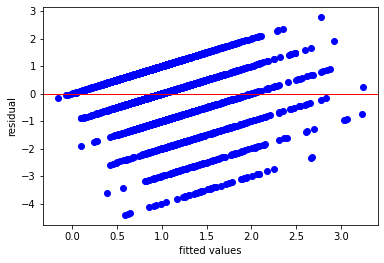

In [204]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

From the scatter plot,the line of best fit does not cover most of the points hence we may need to reevaluate our model and redefine our independent variables.

**2.Logistic Regression**

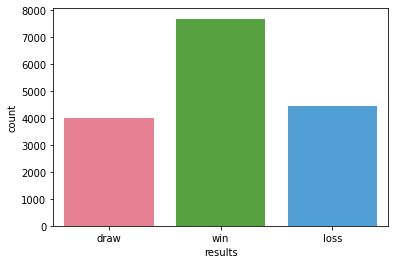

In [206]:
# Checking that our target variable is binary
sns.countplot(x='results',data=fifa_final, palette='husl')

In [207]:
fifa_final.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,result,results
0,1993-08,Colombia,Paraguay,0,0,2,19,67,0,draw
1,1993-08,Colombia,Argentina,2,1,2,19,5,1,win
2,1993-08,Colombia,Peru,4,0,2,19,70,4,win
3,1993-08,Peru,Argentina,0,1,2,70,5,-1,loss
4,1993-08,Peru,Colombia,0,1,2,70,19,-1,loss


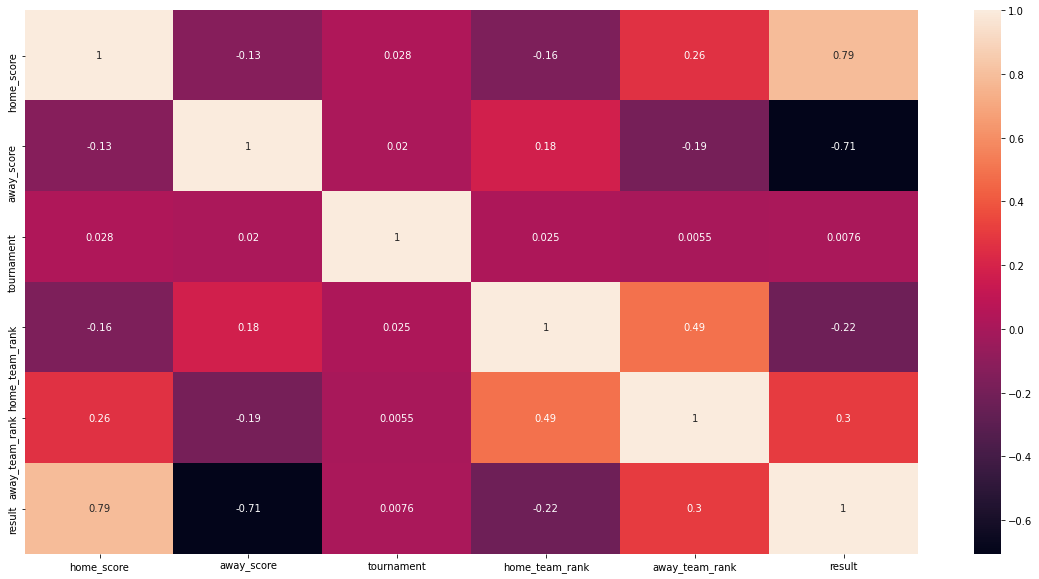

In [208]:
# Checking for independence between features¶
# 
plt.figure(figsize = (20,10))
sns.heatmap(fifa_final.corr(), annot=True)

In [212]:
#Defining the target variable and attributes
X =fifa_final.drop(columns= ['date', 'home_team',	'away_team','results'])
y =fifa_final.results

In [214]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [215]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 797,    0,    0],
       [   0,  898,    0],
       [   0,    0, 1537]])

In [217]:
# Measuring the accuracy of the model
#
from sklearn.metrics import accuracy_score
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')

The accuracy of the model is 1.0


 The model has an accuracy of 100%.It is clearly overfitting on the training data; 
Therefore we need to reevaluate our model

**Hyperparameter Tuning**

In [228]:

X = fifa_final.drop(['results', 'home_team', 'away_team','date', 'tournament'],axis=1)
y = fifa_final["result"]

# Performing Data Preprocessing
# ---
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [229]:

# random search logistic regression model on the fifa dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# define model
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0)

search = clf.fit(X,y)

search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}


our best parameters are 'C': 2.195254015709299, 'penalty': 'l1'

## **7.Challenging the Solution**

Our Polynomial regressions models were not as effective hence other prediction models could have been used to predict the scores successfully.

# **8.Conclusion**

We were able to analyse the dataset and come up with predictive models.However for our polynomial regression models, the RMSE are close to the mean of the target variables meaning the predictive model may not be the optimal model to use for this dataset. We need to reevaluate our variables and explore other models to perform predictions.